# Data Visualization Project - Ironhack

The dataset (netflix_titles.csv) contains information concerning TV Shows and Movies added to the Netflix catalog, including:

General information: id, title, type (TV Show or Movie), director, cast and a brief description.
Date fields: When the show was released and when it was added to the catalog.
Categorization: Rating and category in which the show is listed.
    
In the present notebook I am going to analize the relation between 
I go through some wrangling, and some exploratory analysis as well, gaining insight of the kind of content available in the Netflix and how the nature of the content has changed (if it changed at all) through the years.

In [3]:
#Explicacion data 

In [4]:
#The UIS is the only statistical agency to provide a global perspective on the world’s most lucrative cultural industry and one of the most popular cultural practices – movie-watching. Demand for data has never been greater as digital technology transforms the ways in which films are produced, distributed and consumed by audiences in theatres and homes.  

#The Institute conducts a biennial survey on feature film and cinema statistics to monitor global trends in selected areas of this industry. This is the only international survey to include countries in all regions and at all stages of development – from Hollywood to Bollywood and Nollywood. It uses comparable definitions to collect data on a range of issues, including the Top 10 films viewed per country; linguistic diversity in film production; admissions; national versus international co-productions per country; and distribution mechanisms.

#The survey provides a unique perspective on how different countries and regions are transforming traditional approaches to the art and industry of film-making. The data can be used to track trends in consumption, for example, by looking at the origins of films viewed versus the most popular films, based on attendance. The data also reflect issues related to cinema infrastructure and access, as reflected by the numbers of indoor cinemas and average ticket prices per capita.  

In [5]:
#Trends in movie production reflected in the example of Netflix

## Loading data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xlrd
import plotly

In [7]:
titles = pd.read_csv('netflix_titles.csv')
titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Basic Information

In [8]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [9]:
titles.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [10]:
titles.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Data Transformation

Enforcing data types

In [11]:
titles.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

The column "date_added" is not a datetime. I convert its values into dates:

In [12]:
titles['date_added'] = pd.to_datetime(titles['date_added'])

In [13]:
titles.dtypes

show_id                  int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [14]:
data = pd.read_csv('CUL_DS_12122020171930981.csv')
data

,INDICATOR,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,220006,Total number of national feature films produced,AUS,Australia,2011,2011,43.0,NaN,NaN
1,220006,Total number of national feature films produced,AUS,Australia,2012,2012,29.0,NaN,NaN
2,220006,Total number of national feature films produced,AUS,Australia,2013,2013,26.0,NaN,NaN
3,220006,Total number of national feature films produced,AUS,Australia,2014,2014,39.0,NaN,NaN
4,220006,Total number of national feature films produced,AUS,Australia,2015,2015,33.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1762,220170,Number of national feature films shot digitally,FJI,Fiji,2017,2017,NaN,n,Magnitude nil or negligible
1763,220171,Number of national feature films not shot digi...,FJI,Fiji,2016,2016,NaN,n,Magnitude nil or negligible
1764,220171,Number of national feature films not shot digi...,FJI,Fiji,2017,2017,NaN,n,Magnitude nil or negligible
1765,FPFPROD_NADIG,Percentage of national feature films that are ...,FJI,Fiji,2016,2016,NaN,a,Category not applicable


In [15]:
data.columns

Index(['INDICATOR', 'Indicator', 'LOCATION', 'Country', 'TIME', 'Time',
       'Value', 'Flag Codes', 'Flags'],
      dtype='object')

In [16]:
time_use = pd.read_excel('Time-Use-in-OECD-Countries-OECD.xlsx')

XLRDError: Excel xlsx file; not supported

In [17]:
time_use

NameError: name 'time_use' is not defined

In [18]:
time_use.info()

NameError: name 'time_use' is not defined

In [19]:
time_use.Category.unique()

NameError: name 'time_use' is not defined

## Exploratory Analysis and Visualization

I will now visualize the above data into various graphs and charts for a better understanding of trends.

**Most number of titles produced per country**

In [20]:
#roup the number of titles produced per country and then will plot two figures
most_titles_produced = titles.groupby('country').count().sort_values('title',ascending=False).head(10)

most_titles_produced.reset_index(inplace=True)
most_titles_produced

,country,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
0,United States,2032,2032,2032,1475,1808,2026,2032,2029,2032,2032,2032
1,India,777,777,777,721,755,777,777,777,777,777,777
2,United Kingdom,348,348,348,175,291,347,348,348,348,348,348
3,Japan,176,176,176,55,174,175,176,175,176,176,176
4,Canada,141,141,141,88,125,141,141,141,141,141,141
5,South Korea,136,136,136,39,133,136,136,136,136,136,136
6,Spain,117,117,117,83,103,117,117,117,117,117,117
7,France,90,90,90,51,77,90,90,90,90,90,90
8,Mexico,83,83,83,55,78,83,83,83,83,83,83
9,Turkey,79,79,79,60,79,79,79,79,79,79,79


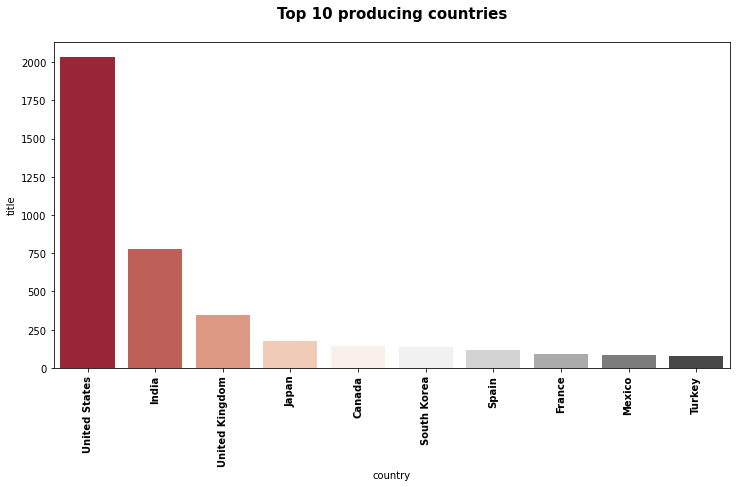

In [21]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

ax = plt.subplot(gs[0])

sns.barplot(x=most_titles_produced.country, y=most_titles_produced.title, data=most_titles_produced, palette="RdGy")
#hue colors: Movies and TV

ax.set_xticklabels(most_titles_produced.country, fontweight='bold', rotation='90')
ax.set_title('Top 10 producing countries\n', fontsize=15, fontweight='bold');

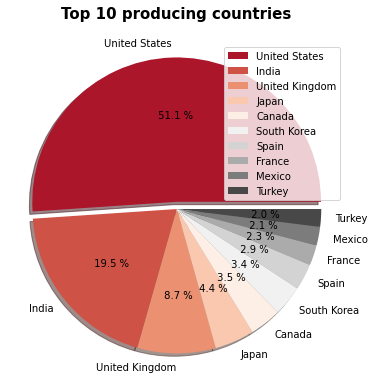

In [22]:
fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

explode = [0 for _ in range(10)]
explode[0] = 0.05

ax2 = plt.subplot(gs[1])

labels = most_titles_produced.country
sizes = most_titles_produced.title 

ax2.pie(sizes, labels=labels, shadow=True, startangle=0, autopct ='% 1.1f %%', explode=explode, colors=sns.color_palette("RdGy", n_colors=10))
ax2.axis('equal')

ax2.set_title('Top 10 producing countries\n', fontsize=15, fontweight='bold')
plt.legend(labels, loc=0);

Both bar and pie plot show that the USA clearly produces more than 50% of all titles. USA is currently leading by a huge margin followed by India and United Kingdom.

**Some other basic plots about the dataset**

In [23]:
from collections import Counter

#Define displayed years:
years = list(range(2008,2020,1))

#separate movies and tv_shows:
movie_rows = titles.loc[titles["type"] == "Movie"]
tv_rows = titles.loc[titles["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

# Calculate percentages of movies and tv shows:
movies_per = round(movie_rows.shape[0] / titles["type"].shape[0] * 100, 2)
tvshows_per = round(tv_rows.shape[0] / titles["type"].shape[0] * 100, 2)

#Top Movie and TV Show producer country:
top5_producer_countrys = titles.country.value_counts().sort_values(ascending=False).head(5)

#Top most commen Actors an directors (Movies and tv shows):
casts = ", ".join(titles.copy().fillna("")['cast']).split(", ")
counter_list = Counter(casts).most_common(5)
most_commen_actors = [i for i in counter_list if i[0] != ""]
labels = [i[0] for i in most_commen_actors][::-1]
values = [i[1] for i in most_commen_actors][::-1]

most_commen_directors = titles.director.value_counts().head(5).sort_values(ascending=True)

Movies and TV Shows released by Netflix per year

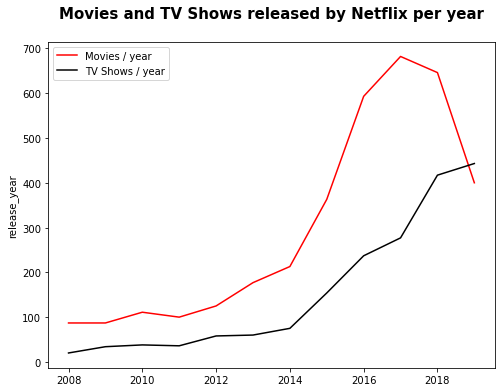

In [24]:
fig = plt.figure(figsize=(8, 6))
#gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

sns.lineplot(data=movies, color="r", label="Movies / year")
sns.lineplot(data=tv_shows, color="black", label="TV Shows / year").set_title('Movies and TV Shows released by Netflix per year\n', fontsize=15, fontweight='bold');

Percentage of movies and TV shows

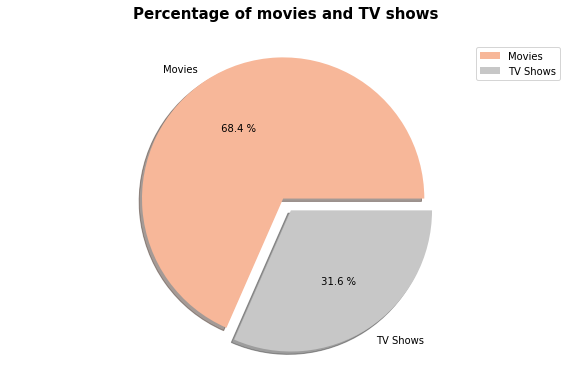

In [25]:
fig = plt.figure(figsize=(10, 6))

plt.pie([movies_per, tvshows_per], labels=["Movies", "TV Shows"], shadow=True, startangle=0, autopct ='% 1.1f %%', explode=(0, 0.1), colors=sns.color_palette("RdGy", n_colors=2))
plt.axis('equal')

plt.title('Percentage of movies and TV shows\n', fontsize=15, fontweight='bold')
plt.legend(["Movies", "TV Shows"], loc=0);

Bar chart of top 5 most common actors and directors

In [26]:
sns.barplot(x=most_titles_produced.country, y=most_titles_produced.title, label= data=most_titles_produced, palette="RdGy")
#hue colors: Movies and TV

ax.set_ylabel('Number Occurring')
ax.set_xticklabels(labels + list(most_commen_directors.index), fontweight='bold', rotation='90')
ax.set_title('Top 5 most commen actors and directors\n', fontsize=15, fontweight='bold');


rects2 = axes[1, 1].bar(labels, values, width, label='Actors',)

rects3 = axes[1, 1].bar(most_commen_directors.index, most_commen_directors.values, width, label='Directors')

SyntaxError: invalid syntax (<ipython-input-26-553e87d52839>, line 1)

In [27]:
#https://www.kaggle.com/onyonixch/netflix-movies-tv-shows-eda-and-clustering

**Movie Duration Distribution**

In [52]:
#https://seaborn.pydata.org/generated/seaborn.displot.html #bivariate plot

In [51]:
#https://www.kaggle.com/arindambaruah/how-did-netflix-and-chill-get-famous/notebook

In [90]:
# Examine duration column wether Netflix tend to add shorter or longer movies
titles[titles.type == 'Movie'].duration.head()

0     90
1     94
4     99
6    110
7     60
Name: duration, dtype: int32

In [91]:
def to_minutes(series): #function to return only the first element
    return series.split()[0]
    
        
titles['duration'] = titles.duration.apply(lambda x: to_minutes(x))

AttributeError: 'int' object has no attribute 'split'

In [92]:
titles[titles.type == 'Movie'].duration.head()

0     90
1     94
4     99
6    110
7     60
Name: duration, dtype: int32

In [93]:
titles['duration'] = titles.duration.astype('int')

In [94]:
#What is the average and median duration of all movies?
titles[titles.type == 'Movie'].duration.mean()

99.10082063305978

In [95]:
titles[titles.type == 'Movie'].duration.median()

98.0

The average duration for all movies released on Netflix is ~ 99 minutes and has a median of 98 minutes. Visualizing the distribution of movie durations can give us a more clear picture of the data.

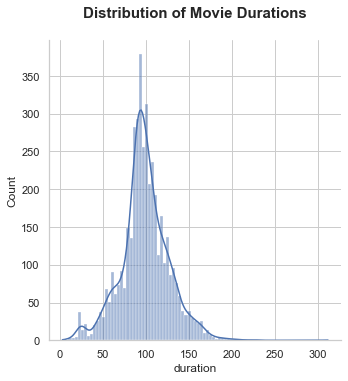

In [109]:
sns.set(style='whitegrid')

sns.displot(titles[titles.type == 'Movie'].duration, kde=True)

plt.title('Distribution of Movie Durations\n', fontsize=15, fontweight='bold');

C:\Users\Anna\Anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


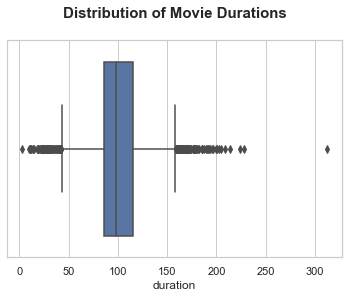

In [102]:
sns.boxplot(titles[titles.type == 'Movie'].duration)

plt.title('Distribution of Movie Durations\n', fontsize=15, fontweight='bold');

The interquartile range appears to be fairly small and there are many outliers present.

Average duration of movies for each year

In [110]:
duration_by_year = titles[titles.type == 'Movie'].groupby(titles.date_added.dt.year).mean().duration
duration_by_year

date_added
2008.0     81.000000
2009.0     66.500000
2010.0     84.000000
2011.0     93.461538
2012.0     76.500000
2013.0     83.500000
2014.0     77.000000
2015.0     82.758621
2016.0     84.143939
2017.0     97.125958
2018.0    101.986822
2019.0    100.813713
2020.0    106.877551
Name: duration, dtype: float64

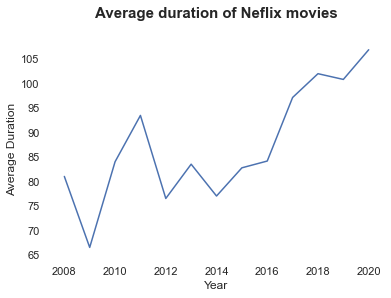

In [114]:
fig, ax = plt.subplots()

ax.plot(duration_by_year)
ax.grid(False)
ax.set_title('Average duration of Netflix movies')
ax.spines['right'].set_visible(False) #removing spines to minimize chartjunk
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Year')
ax.set_ylabel('Average Duration')

plt.title('Average duration of Neflix movies\n', fontsize=15, fontweight='bold');

We can see that Netflix has added longer movies over time, on average.

**Movies Duration Relationship**

In [41]:
movies_duration = titles[titles['type'] == 'Movie'].filter(['american', 'duration'])
movies_duration['duration'] = movies_duration['duration'].map(lambda x: x.replace(' min', ''))
movies_duration['duration'] = pd.to_numeric(movies_duration['duration'])
#movies_duration['american'] = np.where(['photos']!= '[]', True, False)

movies_duration

,duration
0,90
1,94
4,99
6,110
7,60
...,...
5577,70
5578,102
5579,88
5580,109


In [42]:
import plotly.express as px

px.box(movies_duration, y="duration", color='american');

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['duration'] but received: american

This tells us that, in general, foreign movies are longer than american productions. Also, the american movies seem to be more concentrated around the median than the foreign. We can further cement this insight by means of a violin plot.

In [ ]:
fig = px.violin(movies_duration, y="duration", color="american", box=True, hover_data=movies_duration.columns)
fig.show()

In [ ]:
#https://www.kaggle.com/augusto1982/netflix-movies-and-tv-shows-analysis

In [ ]:
#https://www.kaggle.com/jmcquillan/exploring-the-netflix-dataset

In [ ]:
# scatter plot

In [116]:
top_listed_genre = titles.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
top_listed_genre

title
Norm of the North: King Sized Adventure        Children & Family Movies
Norm of the North: King Sized Adventure                        Comedies
Jandino: Whatever it Takes                              Stand-Up Comedy
Transformers Prime                                             Kids' TV
Transformers: Robots in Disguise                               Kids' TV
                                                         ...           
A Young Doctor's Notebook and Other Stories            British TV Shows
A Young Doctor's Notebook and Other Stories                 TV Comedies
A Young Doctor's Notebook and Other Stories                   TV Dramas
Friends                                               Classic & Cult TV
Friends                                                     TV Comedies
Length: 13670, dtype: object

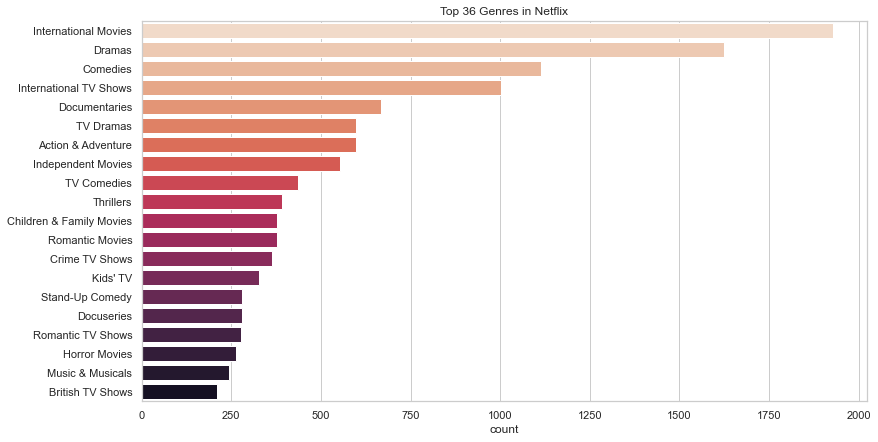

In [120]:
plt.figure(figsize=(13,7))
plt.title('Top 36 Genres in Netflix')
sns.countplot(y = top_listed_genre, order=top_listed_genre.value_counts().index[:20], palette='rocket_r')
plt.show()

The most popular category on Netflix, with the most titles, is international Movies, and then Dramas in the second state.

In [123]:
#https://seaborn.pydata.org/tutorial/regression.html

In [ ]:
#fig = plt.figure(figsize=(20, 6))
#gs = gridspec.GridSpec(nrows=1, ncols=3, height_ratios=[6], width_ratios=[10, 5])

#ax = plt.subplot(gs[3])

sns.scatterplot(x=titles.release_year, y=titles.release_year, hue=titles.type, data=titles, palette="RdGy")

#ax.set_xticklabels(most_titles_produced.country, fontweight='bold', rotation='90')
#ax.set_title('Top 10 producing countries\n', fontsize=15, fontweight='bold');

In [ ]:
#https://www.kaggle.com/ranjithks/ran-visualization-on-netflix-movies-tv-shows

In [ ]:
#https://www.kaggle.com/imchentouf/netflix-movies-and-tv-shows plus data story telling == scatter plot

In [ ]:
shows_by_month = group_and_count_by(df[df['year_added'] < 2020], ['month_added', 'type'])
fig = px.bar(shows_by_month, x='month_added', y='count', color='type', barmode='group')
fig.show()

# Sources

https://www.kaggle.com/shivamb/netflix-shows
https://stats.oecd.org/Index.aspx?DataSetCode=TIME_USE